Background Functions
Hit "Play" button here to install packages and functions we'll use.

In [ ]:
#  @title Background Functions
!pip install ipywidgets

import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from astropy.constants import G
from scipy.stats import norm
import ipywidgets as widgets
from IPython.display import display, Markdown, clear_output, Latex
from ipywidgets import interactive
from IPython.display import display, clear_output

# Define the gaussian_maker function
def gaussian_maker(s):
  # Parameters for the Gaussian distribution
  mean = 42
  std_dev = s

  # Generating a random sample from the Gaussian distribution
  data = np.random.normal(mean, std_dev, 1000)

  # Plotting the histogram of the sample
  count, bins, ignored = plt.hist(data, bins=30, density=False, alpha=1, color='r', label = 'Histogram of Values')
  bin_width = bins[1] - bins[0]

  # Plotting the Probability Density Function (PDF)
  xmin, xmax = plt.xlim()
  x = np.linspace(xmin, xmax, 100)
  p = norm.pdf(x, mean, std_dev) * len(data) * bin_width
  plt.plot(x, p, 'k', linewidth=2, label = 'Shape')
  plt.axvline(x=mean, color='b', linestyle='--', label='Mean Value: x = ' + str(mean))

  title = "Fit results: Mean = %.2f,  Standard Deviation = %.2f" % (mean, std_dev)
  plt.xlabel('Value')
  plt.ylabel('# of times it appears')
  plt.legend()
  plt.title(title)
  plt.xlim(-10,95)
  plt.ylim(0,100)
  plt.show()

def gaussian_slider():
# Create an interactive widget
  interactive_plot = interactive(gaussian_maker, s=widgets.FloatSlider(
      value=1.0,
      min=0,
      max=50,
      step=1,
      description='STD:',
      continuous_update=True,
      orientation='horizontal',
      readout=True,
      readout_format='.1f'
  ))

  # Display the interactive widget
  display(interactive_plot)


def make_gaussian(m,s, colour):
  '''
  Different from gaussian_maker as this one returns the produced gaussian data sets.
  Only used in the combined plot of the two gaussian at the end of the Statistics section.
  '''

  # Parameters for the Gaussian distribution

  mean = m
  std_dev = s

  # Generating a random sample from the Gaussian distribution
  data = np.random.normal(mean, std_dev, 1000)
  '''
  # Plotting the histogram of the sample
  count, bins, ignored = plt.hist(data, bins=30, density=False, alpha=1, color=colour, label = 'Histogram of Values')
  bin_width = bins[1] - bins[0]

  # Plotting the Probability Density Function (PDF)
  xmin, xmax = plt.xlim()
  x = np.linspace(xmin, xmax, 100)
  p = norm.pdf(x, mean, std_dev) * len(data) * bin_width
  plt.plot(x, p, 'k', linewidth=2, label = 'Shape')
  plt.axvline(x=mean, color='b', linestyle='--', label='Mean Value: x = ' + str(m))

  title = "Fit results: Mean = %.2f,  Standard Deviation = %.2f" % (mean, std_dev)
  plt.xlabel('Value')
  plt.ylabel('# of times it appears')
  plt.legend()
  plt.title(title)
  plt.show()
  '''
  return data

def std_plot(data1, data2, m,s1, s2, colour1, colour2):
  # Plotting the histogram of the sample
  mean = m
  std_dev1 = s1
  std_dev2 = s2
  plt.figure(figsize=(10, 6))
  count1, bins1, ignored = plt.hist(data1, bins=30, density=False, alpha=1, color=colour1, label = 'Histogram of Values - Blue')
  count2, bins2, ignored = plt.hist(data2, bins=30, density=False, alpha=1, color=colour2, label = 'Histogram of Values - Red')
  bin_width1 = bins1[1] - bins1[0]
  bin_width2 = bins2[1] - bins2[0]
  # Plotting the Probability Density Function (PDF)
  xmin, xmax = plt.xlim()
  x1 = np.linspace(xmin, xmax, 100)
  x2 = np.linspace(xmin, xmax, 100)
  p1 = norm.pdf(x1, mean, std_dev1) * len(data1) * bin_width1
  p2 = norm.pdf(x2, mean, std_dev2) * len(data2) * bin_width2

  plt.plot(x1, p1, 'k', linewidth=2, label = 'Shape')
  plt.plot(x2, p2, 'k', linewidth=2)
  plt.axvline(x=mean, color='b', linestyle='--', label='Mean Value: x = ' + str(m))
  plt.hlines(y=np.max(p1)*0.6, xmin=mean, xmax=mean + s1, colors='orange', label='Std Dev for Blue: ±' + str(s1))
  plt.hlines(y=np.max(p2)*0.6, xmin=mean, xmax=mean + s2, colors='indigo', label='Std Dev for Red: ±' + str(s2))
  title = "Standard Deviation of the Two Values"
  plt.xlabel('Value')
  plt.ylabel('# of times it appears')
  plt.legend()
  plt.title(title)
  plt.show()


def mass_bh(a,T):
  '''
  This function takes a (semi-major axis) in metres and T (period) in seconds (the data we are using already has everything in these units,
  so you don't have to change anything). This function also uses some constants like pi and G (gravitational constant) which are taken from
  python libraries.

  The function calculates M based on the formula we derived earlier and it returns the value calculated.
  '''
  M = ((4*np.pi**2)/G.value)*((a**3)/(T**2))
  return M



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.2 MB/s eta 0:00:00


# **Determining the Mass Sagittarius A*:**
##**The Super Massive Black Hole at the Centre of our Galaxy**
---
###Authors: Daniel Chui, Umit Uzunboy, Aryanna Schiebelbein-Zwack

In this python notebook, you will find the mass of SgrA* using two methods. The learning goals for this notebook are:








1. **Gain an fundamental understanding of black holes.**


2. **Define functions that can do computations over an entire array.**


3. **Use statistics, specifically standard deviation, to find the uncertainty
in your black hole mass measurement.**


4. **Visualise data using a scatter plot to look for trends.**


5. **Use an algorithm (curve_fit) to find the line of best fit for the data with uncertainties.**


6. **Apply the line of best fit to derive meaningful physical quantities from your data.**


  Black holes are the densest objects in the universe. Typically, they are formed when stars that are ~10 times the mass of our Sun "die" and stop creating an outward force that counteracts gravity and they collapse. Since these black holes were stars before, they are only about as massive as stars, ranging from 10 to 200 times the mass of our Sun. How then, do most galaxies have black holes at their centres with masses as high as a billion times the mass of the Sun?!

---

<div>
<img src="https://images.ctfassets.net/cnu0m8re1exe/4QY2ChV7Aj3JRoKeYdwKrH/6f22b0f5a0410aa9d224ce5b2c483a28/shutterstock_1561751203.jpg?fm=jpg&fl=progressive&w=660&h=433&fit=fill" width="500"/>
</div>

**Figure (1)**. An artist's representation of a supermassive black hole. Black holes’ gravities are so strong, they can make light beams bend around the black hole, instead of going on a straight path so we see light all around the top and bottom. (Source: SquareMotion/Shutterstock)
---
---

We have our very own resident supermassive black hole (SMBH) at the centre of the Milky Way, called Sagittarius A*, named so because it is located in the constellation Sagittarius. **Consider for a moment, and discuss with your groupmates, how could you possibly determine how massive it is? How can you weigh astrophysical objects?**

---
---

We use orbits to determine masses, since gravity is dictated by the mass of objects and also influences how things orbit. The orbital period is the amount of time it takes for one object to complete an orbit around another. For example, the period of the Earth around the Sun is 1 year. Kepler's third law related the period ($T$) of an object with mass $M_1$, to the distance ($a$) from an object with mass $M_2$, by the equation:

$$T^2 = \frac{4\pi^2}{G(M_{1}+M_{2})}a^3$$

This means if you know how far away an object is from something and the amount of time it takes to orbit, you can compute the mass of the thing it is orbiting! ($G$ is called the gravitational constant and it's a universal constant like the speed of light). For example, we know the distance of the Earth from the Sun and we know it takes 1 year for it to go around the Sun, and with that information alone we can determine the mass of the Sun. Scientists did this exact thing for Sagitarrius A* , by measuring the orbits of stars that went close to it over the span of decades! Andrea Ghez and Reinhard Genzel were awarded the Nobel Prize in 2020 for measuring the mass of Sgr A*, something you are about to do!

---
---
<div>
<img src="https://upload.wikimedia.org/wikipedia/en/c/cf/SO-102_Orbital_Plot.jpg" width="500"/>
</div>

**Figure (2)**. Orbits of two stars, named SO-2 and S0-102, around a hidden object in the centre... (Source: Andrea Ghez et al./UCLA/Keck)
---
---

---
---
<div>
<img src="https://cdn.britannica.com/03/233003-050-0F1480F4/Sagittarius-A-supermassive-black-hole.jpg" width="500"/>
</div>

**Figure (3)**. A real picture of Sagittarius A*, taken by many radio telescopes all over Earth, which were combined to make essentially an Earth sized telescope. When these photos released some people complained they were blurry, but really these are the most resolved images ever taken by humans of anything ever, since we are seeing an object so far away in so much detail! (Source: Event Horizon Telescope)
---
---


# Coding Section

To begin any python project we need to import the packages and data we'll use.

$\textbf{Run the code below:}$

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import interactive
import matplotlib.pyplot as plt
from astropy.constants import G
from scipy.stats import norm
import tester as test

# A function to convert units
def au_to_m(distance):
  #function to convert from AU to m
  return distance*1.496*(10**11)
def year_s(time):
  #function to convert from years to seconds
  t = time*3.154e+7
  return t

#setting some constant for future use
PI = np.pi
G_value = G.value

# Below are two arrays that relate to the motion of 7 stars orbiting SgrA*
# T is the orbital period of the stars
# a is the semi-major axis which is a radius measurment for the elliptical orbits around the blackhole

a_array = np.array([800,980,1750,1800,2290,2630,3300]) # in astronomical units (1 astronomical unit is the distance from the Earth to the Sun)
T_array = np.array([11.5,15.2,36,38,54.4,67.2,94.1]) # in years

T = year_s(T_array) # T in seconds
a = au_to_m(a_array) # a in metres

print(T)
print(a)

[3.627100e+08 4.794080e+08 1.135440e+09 1.198520e+09 1.715776e+09
 2.119488e+09 2.967914e+09]
[1.19680e+14 1.46608e+14 2.61800e+14 2.69280e+14 3.42584e+14 3.93448e+14
 4.93680e+14]


# **Finding M in terms of a and P**

---



One of the many uses of Kepler's Law is finding the relationship between the period of an orbit ($T$), semi-major axis distance ($a$), and the mass of the objects in the system ($M_{tot}$). Let's remember Kepler's law:

\begin{equation}
T^2 = \frac{4\pi^2}{G(M_{star} + M_{blackhole})}a^3
\end{equation}

This formula can look intimidating, but there are ways to make it much simpler! For example, the blackhole we are considering here, SgrA, is a supermassive blackhole. So, as its name suggests, it is very heavy - much much heavier than all the stars in the Milky Way! This means that we can ignore the mass of the stars ($M_{star}$) in the formula. Doing this may seem a bit weird, but imagine like this: you wouldn't mind losing a few apples if you had millions of them.

$\textbf{1. What would the new Kepler's law be with regards to this? Change the equation accordingly.}$

Great! We have an equation that looks more manageable. Now, all there is left to do is to rearrange the equation to have $M_{blackhole}$ on one side and all the other terms on the other.

$\textbf{2. Rearrange the new equation to find an expression describing $M_{blackhole}$ in terms of the other quantities.}$

Perfect! We finally simplified Kepler's law to find what $M_{blackhole}$ would be in terms of the other quantities involved.

Why do you think this process is important? Discuss with your teammates.

After the discussion start the next section.

$\textbf{Solutions}$

See the end of the notebook.

#**Finding the uncertainty in M**

---



Before beginning this section, give yourself a pat on the back because you just solved a problem that astronomers couldn't solve for hundreds of years! Now it is time to put this equation in use and calculate some real life values!

First, we begin with writing the derived equation in our code. Make sure to read the comments.

𝐒𝐞𝐞 𝐭𝐡𝐞 𝐟𝐮𝐧𝐜𝐭𝐢𝐨𝐧 𝐢𝐧 𝐭𝐡𝐞 𝐜𝐨𝐝𝐞 𝐛𝐥𝐨𝐜𝐤 𝐛𝐞𝐥𝐨𝐰 𝐚𝐧𝐝 𝐟𝐚𝐦𝐢𝐥𝐢𝐚𝐫𝐢𝐳𝐞 𝐲𝐨𝐮𝐫𝐬𝐞𝐥𝐟 𝐰𝐢𝐭𝐡 𝐢𝐭:

In [ ]:
#We will be using the function mass_bh(a,T) to calculate the mass of the blackhole given the semi-major axis (a) and orbital period (P).
#Use the example below for practice.

#For advanced level fill in the function below and instead use that function for your calculations.

#Advanced level: Write the function yourself
def mass_bh_advanced(a,T):
  '''
  This function takes a (semi-major axis) in metres and T (period) in seconds (the data we are using already has everything in these units,
  so you don't have to change anything). This function also uses some constants like pi and G (gravitational constant) which are taken from
  python libraries.

  The function calculates M based on the formula we derived earlier and it returns the value calculated.
  Click the button below to reveal the solution to the function.
  '''
  M = ((4*PI**2)/G_value)*((a**3)/(T**2))#use the formula we derived above and write it in python code where M stands for the mass of the blackhole
  return M

#Example:
a_example = 2 #in metres
T_example = 5 #in seconds

#now use the function mass_bh to get the mass of the blackhole by the given example values
M_example = mass_bh(a_example, T_example)
#this way, our code will 'call' the function mass_bh and the function will calculate the mass by the given values: a and T
#then the calculated value will be assigned to the new parameter that we called M_example. Now, let's see what this is:
print(M_example)

189279679268.1537


In [ ]:
# @title Run this code block to check your function's correctness
print(test.test_mass_bh(mass_bh))

Now that there is a function in our code that calculates the mass ($M$) given the period ($T$) and the average separation distance ($a$), we can use our data arrays to calculate the actual mass of the black hole ($M_{blackhole}$).

You might notice that in the example above used only singular values, but we have a whole set of different $a$ and $T$ values. This is because we are performing the same measurement over and over again like you do in your lab classes.

That is not an issue though, because python is smart enough to know that it is given a set of different numbers. So it will calculate separate values of M for each $a$ and $T$ in their arrays.

Let's give it a try and see how it works out:

$\textbf{Write down the code to calculate the mass of the blackhole based on the given values by following the example above:}$

In [ ]:
#remember the code block above
M = mass_bh(a, T)

#Don't forget to print the list that has the maass of the blackhole
print(M)

[7.70725443e+36 8.10991807e+36 8.23255347e+36 8.04036451e+36
 8.07856202e+36 8.01962600e+36 8.07956517e+36]


Perfect! We obtained the list for $M_{blackhole}$. However, as you might also notice, the numbers in this list are not all the same. This might bring up a few questions:

$\textbf{1. Why are the values of our list not all the same if they are all supposed to be the $M_{blackhole}$?}$

$\textbf{2. How can we know the true value of $M_{blackhole}$ based on this list?}$

Discuss this with your groupmates.

---
The answer is Statistics.
#**Statistics**
---

Wait, wait - don't run away now. Statistics is mostly done on computers! So all you have to do is to know what you are doing and which Python functions to use and you are good to go! Let's first see what kind of statistics we need to use and then we can work out our final results.

In a scientific research, we always end up with an array of values that reflect the results of our study. Interestingly, they always have a similar shape when we plot them using histograms.

**Note:** Histograms are the same thing as bar graphs that you learned in elementary school.

This is caused by a theorem in statistics called the ***Central Limit Theorem***. Don't worry, you don't have to know what this is. If you are interested in learning more, you can watch [this video](https://youtu.be/zeJD6dqJ5lo?si=xsyJVFQBVU_AOzYE ) in your own time.

Essentially, thanks to this theory, we learn that whenever you have an array with enough values, the **distribution** of these values have a certain look around its **mean value**.


$\textbf{1. Discuss what the bolded terms mean. Remember the different ways to represent data you learned at school.}$

I can hear you thinking "*Enough with the theory talk, let's see some examples of this*". **Run the code in the code block below.**

**Note: You don't have to understand the code. Focus on the plot.**

In [ ]:
gaussian_slider()

interactive(children=(FloatSlider(value=1.0, description='STD:', max=50.0, readout_format='.1f', step=1.0), Ou…

The histogram above is created using a randomly generated set of numbers.

**Note:** A *set* is basically a collection of numbers.

In this graph, the x-axis shows the value in the set; the y-axis shows how many times that specific value appears - just like the histograms you have seen in maths class. The plotted line shows the **distribution** of the histogram.

Now let's play a little with the slider above. First, move the slider to 3. Then, move it to 25.

**What stays the same about the histogram's distribution?**

You can see that the histogram changes a lot. But, the general shape of the graph (the plotted line) stays somewhat unchanged. This is a perfect example of the Central Limit Theorem. No matter how different the sets are, they *will* follow a similar shape.

Also notice that all these sets are centered around the same value, 42. This is the **mean value** of the distribution. So, from this short demonstration, we can arrive at this conclusion:

*Randomly generated numbers always follow a certain **distribution** around the **mean value**.*

Now, let's take a break and connect some dots:
1. Our purpose is to find a value that represents all the values in our array.
2. By using the Central Limit Theorem, we know that the value must be centered around a **mean value**.

**Does this mean that finding the mean value is enough to represent our data array with only one number?**

Discuss with your groupmates.


---

Well... Not really. To understand why only the **mean value** is not enough, play around with the slider again. Notice that as you play with the slider, the computer generates different sets. All these different sets are centered around the **mean value** of 42. So, using only the **mean value** is not enough, because there can be other sets that share the same **mean value**.

So we are going to need another parameter that will help us represent our data.

**What do you notice that is different in all data sets when you move the slider?**

You can see that the width of the **distribution** is changed every time you move the slider. Let's see a better example of this.

**Run the code block below.**



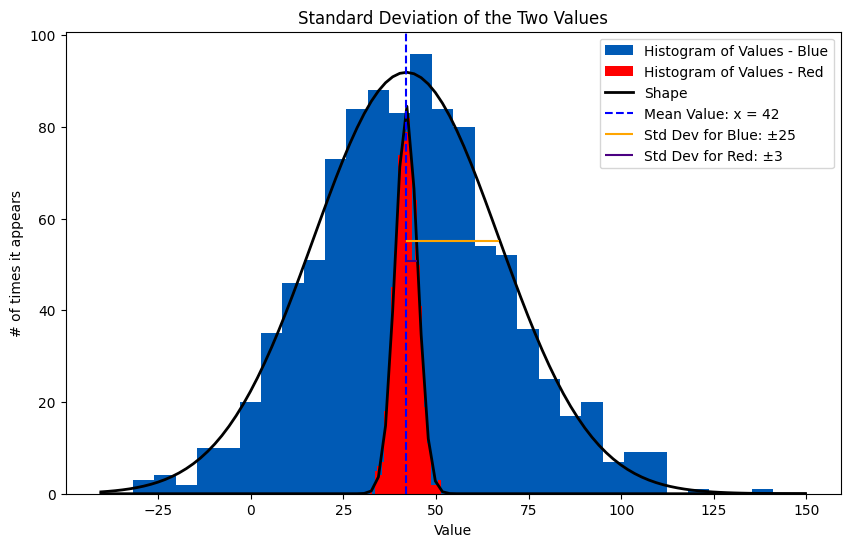

In [ ]:
red_set = make_gaussian(42,3, 'r')
green_set = make_gaussian(42,25, '#005AB5')

std_plot(green_set, red_set, 42, 25, 3, '#005AB5', 'r')

You can notice that, apart from their colors, the two plots look alike. Well, look a bit closer.

**What is the difference between the red plot and the green plot? Focus on the x-axis.**

The numbers on the x-axis of the plots are different. The values in the red histogram go to around 52, while in the green histogram, there are values as high as 125.

This is a big difference in the two sets. Even though they are centered around 42, the red histogram has less **variance** in its values compared to the green histogram. That is why, only using the **mean value** to represent the entire set is not enough. We must introduce another term that tells us about the **variance** of the sets from the **mean value**. That value in Statistics is called the **Standard Deviation**.

We can easily calculate the Standard Deviation of a set by using Python tools as we are going to see soon. Before that though, take a look at how the standard deviation of the red and green sets look like in the above graph.

---

Do you see how different the two arrays are despite having the same mean value?

The Standard Deviation of each **distribution** is given by the orange and purple horizontal lines. They show how much the values *deviate* (**vary**) from the mean value. Now, let's connect some dots for the final time:
1. We are looking for a way to represent our data set with a number that summarizes our entire data set.
2. We learned that using only the **mean value** of the set is not enough.
3. We found that the **standard deviation** tells us how much the values **vary** from the mean value.
4. What if we used both the **mean value** and **standard deviation** to represent our data?

**Is using the mean value and standard deviation of a set enough?**

Well, yes! Using both the **mean value** and the **standard deviation** is enough for us to represent our entire data set. One tells the center of our data and the other tells how much our data changes compared to the center.

---


Now that we know about **mean value** and **standard deviation**, let's do an example to calculate them using Python:

$\textbf{Follow the instructions in the code block below to find the Mean and the Standard Deviation of the Example List:}$


In [ ]:
#let's first write down the list. Remember the introduction to python module.
list_1 = [42, 18, 75, 9, 63, 30, 51]
'''
The Numpy library has functions that calculate the mean value and the standard deviation value of a list. Let's see them:
To find the mean, use the np.mean() function.
To find the standard deviation, use the np.std() function.
Example use:
mean = np.mean(list_name)
st_dev = np.std(list_name)

'''
mean = np.mean(list_1)
st_dev = np.std(list_1)
#Don't forget to print out your values.
print(mean)
print(st_dev)

41.142857142857146
22.087026388671642


$\textbf{After seeing what the Standard Deviation stands for, what do you think the value we found means?}$

Discuss with your groupmates.

After the discussion, use the code block below to find the average value and standard deviation of the blackhole mass list.

In [ ]:
#use the example as a guide and don't forget to print out your value

M_mean = np.mean(M)
M_st_dev = np.std(M)

print(M_mean)
print(M_st_dev)

8.03826338031651e+36
1.493469334029707e+35


$\textbf{What does this Standard Deviation mean? Is it too high? What does it mean when it is too high or too low?}$

Discuss with your groupmates.

Standard deviation and the mean value of a set are important values that represent the data set. They are widely used in astronomy and other sciences to analyze large amounts of data and have many different purposes. In our case, we will be using the standard deviation in the blackhole mass data set as the uncertainty of the mean - which stands as the observed mass of the SgrA* supermassive blackhole.

Don't forget to round the numbers up to three significant figures/digits and use scientific notation to represent the final result. It is important to write our mean value and the uncertainty with the same amount of signficant digits.

One final final step is to convert kg units to Solar Mass ($M_{\odot}$) units. These units represent how much an object weighs compared to our Sun.

**Use the fact that our Sun is $1.989 \times 10^{30}$ kg to convert $M_{SgrA*}$ into Solar Mass units.**

In [ ]:
#Create a variable that gives our Sun's mass in kgs:
sun_mass_kg = 1.989 * 10**30 #kg/Solar mass

#Remember that M_mean is in kg as well.
#HINT: Think about how many Suns are in M_mean.
M_mean_solar = M_mean/sun_mass_kg

#Don't forget to do the same operation on M_st_dev as well! This is called uncertainty propagation and we will see a more complicated example at the end.
M_st_dev_solar = M_st_dev/sun_mass_kg

#Print the values
print(M_mean_solar)
print(M_st_dev_solar)

4041359.165568883
75086.44213321804


Now, write your solution in the same format as before: 3 significant figures and use scientific notation!

Bravo! You have calculated the mass of the supermassive blackhole that sits in the center of our galaxy! Now, you can check with [Wikipedia](https://en.wikipedia.org/wiki/Sagittarius_A*) or some other source to verify our result. You will see that our value may not fit with the values from the other sources.

$\textbf{Discuss with your groupmates about why our result can be different from the other results? How can we improve our result to fit the real value better?}$

**After your discussion, start the next exercise which will teach you a better way to calculate the mass of the blackhole more accurately.**

##**Finding $M_{bh}$ Using An Algorithm**

---



The above exercise has given you a great set of tools to find the mass (with uncertainty) of a blackhole. We'll now present another method of doing the exact same thing.




**Why**? Because astronomers are lazy.




Jokes aside, computers are much better at doing large sets of computations than humans so we should always try to exploit this power and take as much of the load off of us as we can.

Instead we'll use a function in python that can, in only a couple lines of code, find $\frac{G}{4\pi^2}M_{blackhole}$ with uncertainty. From that, we will use some algebra and isolate $M_{blackhole}$ itself.



Before we fit our black hole data lets start with a fitting tutorial where the variables and data are general so that you can apply the same process to any data you want to fit in the future. Its sort of like a jazz musician learning their chords and scales so that they are ready for any gig they are called to do.

**The road map for fitting a linear relationship is as follows:**

1. Load and plot the data
2. Define a fitting equation
3. Fit the loaded data to the fitting equation
4. Print the slope with uncertainties and plot everything.

Lets get started by loading the data ("loading data" means assigning variable names to data in python so we can use them).

$\textbf{Edit the block of code below to load the data:}$

In [ ]:
# The following code creates random X and Y data. Its not important making sense
# of the meaning in the code below because its essentially simulating a random experiment.
# For example X could be age of people and Y could be heights. For the black hole, the X and Y
# data are oribtal periods and orbital radii.

# 1. Load Data
X = np.random.normal(3, 1, 100) # Creates random data with inputs
Y = 0.8 * (X + np.random.normal(0, 0.1, 100)) + 0.66 # Creates random outputs

In [ ]:
print(X,Y) # See the data

What do you notice about the data you printed above? It's not very clear what is going on. Instead we will now plot the data. Plotting the data will take those large sets of numbers above and represent them in a way that we can understand.


Plotting falls under the topic of "data visualisation" in science. People that do science and work with data need to represent their findings in clear and coherant ways so that they can understand and explain it to people other than themselves. For example, If I was a leading scientist that did ten-thousand IQ tests but I represented my findings in the form of an Excel spreadsheet or like the data above, I would be laughed at. However, If I plotted the scores using a [histogram](https://en.wikipedia.org/wiki/Histogram), I would discover the famous [IQ Bell Curve](https://en.wikipedia.org/wiki/Normal_distribution).

But back to the topic at hand.


$\textbf{Edit the block of code below to plot the data:}$

In [ ]:
# Below defines the skeleton for an X vs. Y plot using matplot.library
# There are a ton of things you can customize so I'll drop the basic skeleton below and
# a more personalized plot example after. Play around as much as you can and make something interesting!

plt.figure()                        # Tells python its time to plot
plt.scatter(X, Y)                   # Creates a scatter plot of (X, Y)

plt.title("Edit Here")              # Adds a title between the quotes
plt.xlabel("Edit Here")             #      an axis label for x
plt.ylabel("Edit Here")             #      an axis label for y

# The below code is my personal choice of data visualisation, feel free to use it or make your own going forward.

plt.figure()
plt.scatter(X, Y, color = "crimson", marker = "*", s = 50, label = "Data points", alpha = 0.7 ) # Colour, Dot Style, Size, Legend Label, Opacity.

plt.title("Y vs. X")
plt.xlabel("X data")
plt.ylabel("Y data")

plt.grid("on")                    # Adds a grid to the plot
plt.legend()                      # Throws on a legend for your scatter label

Take some time to mess around with the different settings on your plots. Think critically about what makes a good plot and a bad plot and briefly discuss the impact that the following points have on the efficacy of a plot with your group:

1. Title and labels
2. Marker size and style (when would you need to have a different marker style?)
3. Colours (can all people see the same colours?)

Its interesting to note that a huge effort is put into teaching university students how to represent their data in an effective way because it is such a crucial aspect of scientific research. It's a skill akin to essay writing. If you want to keep messing around with the different settings, I'll provide the manual for plt.scatter [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).



**What do you notice about the data you just plotted?**


The data follows a clear linear trend.

$\texttt{curve_fit}$ will draw the line of best fit using an algorithm called ['least-squares'](https://en.wikipedia.org/wiki/Regression_analysis). In the case of the data above, $\texttt{curve_fit}$ will create a line of best fit in the form $y = mx+ b$ and experiment with the slope and intercept until it thinks its found the best line. The specifics are rather involved but you can get an idea of what $\texttt{curve_fit}$ is doing by changing the sliders on the plot below.

In [ ]:
# RUN THIS CELL

def line_maker(m,b):
    x = X
    y = m*x + b
    plt.figure(figsize=(10, 6))
    plt.plot(x, y)
    plt.scatter(X, Y, color = "crimson", marker = "*", s = 50, label = "Data points", alpha = 0.7 )

    plt.title("Y vs. X")
    plt.xlabel("X data")
    plt.ylabel("Y data")
    plt.xlim(np.min(X)-1,max(X)+1)
    plt.ylim(np.min(Y)-1,max(Y)+1)
    plt.grid("on")
    plt.legend()
    plt.title(f'')
    plt.xlabel('')
    plt.ylabel('')
    plt.grid(True)
    plt.show()

# Create an interactive widget
interactive_plot = interactive(line_maker, m=widgets.FloatSlider(
    value=1.0,
    min=0.0,
    max=5.0,
    step=0.1,
    description='m',
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.1f'
),b=widgets.FloatSlider(
    value=1.0,
    min=-5.0,
    max=5.0,
    step=0.1,
    description='b',
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.1f'))

# Display the interactive widget
display(interactive_plot)

interactive(children=(FloatSlider(value=1.0, description='m', max=5.0, readout_format='.1f'), FloatSlider(valu…

How does your line of best fit look?

What you have just done is manually try to fit a curve to the data. Are you confident in your fit? Could it be better? The problem with manually fitting the line is that while you can get a general idea of your data, you can't be sure that your fit is the **best** possible fit.

$\texttt{curve_fit}$ solves this problem as it applies an optimization algorithm to make sure you have the best fit.

Lets get into it!

---




To get started we need to define a fitting polynomial. Don't be intimidated though because a fitting polynomial is just the type of line you want $\texttt{curve_fit}$ to draw.


\
**If you don't know what polynomials are you've likley seen them. Here are a few examples:**\
$y = x$ \
$y = x^2$ + 5 \
$y = 505x^{6} - 7x + 42$ \
They are the equations containing powers of x.


\\
The $\texttt{curve_fit}$ function will take three inputs which are the X data, Y data, and a parameter relating to the polynomial called its "degree". The degree of a polynomial is given by the highest power of x that appears in it. The above polynomials have degree: 1, 2, and 6. With these three inputs, it will try and fit the X and Y data to the shape given by the polynomial.

By looking at our X and Y data above we see we want to draw a fit of $y = mx + b$, a straight line. But if our data looked more curved, we could for example, fit a parabola of the form $y = x^2$.

$\textbf{Edit the block of code below to define a linear fitting polynomial:}$

In [ ]:
# Lets quickly define the line equation which python can use to fit with

def line(x,m,b):
    '''
    Curve_fit is a powerful tool because we can ask it to do many types of fits.

    For our purposes though, we want to define a fit of the line form.
    Define the line form below using x, m, and b (use * to multiply and + to add).
    '''
    y =   m*x + b

    return(y)

# You have now defined a linear function called "line"

In [ ]:
# @title Default Run the code block below to check your function's correctness
print(test.test_line(line))

Finally we are ready to use the $\texttt{curve_fit}$ function. Like any function, it takes inputs and gives outputs. In this case, $\texttt{curve_fit}$ takes 3 inputs: the fitting polynomial, X data,Y data. And it returns two outputs, the fitting parameters (slope and y-intercept) and a value related to the uncertainty in each of those parameters.



Behind the scenes, $\texttt{curve_fit}$ is using a branch of math called 'linear algebra' which involes large scale computations with what are called 'matricies' (singular: matrix). It's not necessary to try and wrap your head around them right now, but matricies speed up computation drastically and are used for all sorts of large scale computing like 3D-rendering, stock market analysis, and of course Astronomy.

$\textbf{Edit the block of code below and run the fitting function:}$

In [ ]:
# Call the curve_fit function and define the two important outputs ("calling a function" means running the function).

m, m_var = curve_fit(line, X, Y)       # Change 'FIT' to the name of your linear function you just defined above.
                                        # The m output is the slope, the m_var output is the variance.
                                        # We know how to find the uncertainty from the variance by just taking the square root:

m_delta = np.sqrt(np.diag(m_var))       # Just like in the previous exercise, the uncertainty is the
                                        # standard deviation which is the square root of the variance
                                        # It's not overly significant, but if you're curious about the np.diag term,
                                        # ask a helper (it'll test their knowledge too :)

In [ ]:
print("The slope of the line is:", m[0], "The y-intercept is:", m[1]) # m[0] is the slope and m[1] is the intercept.
                                                                      # You can also just print m itself.
print("The uncertainty in the value of m is:", m_delta[0], "The uncertainty in the y-intercept value, b,  is:", m_delta[1])

The slope of the line is: 0.8105138882623057 The y-intercept is: 0.627941533669094
The uncertainty in the value of m is: 0.00788990699119406 The uncertainty in the y-intercept value, b,  is: 0.02516561831976562


You've done it! It took a bit of setup, but the block above is the powerful two lines of code mentioned earlier. Notice that the uncertainty in the m and b values is small which is what we like to see. Lets quickly plot the line of best fit over the data and move on to the black hole.

$\textbf{Edit the block of code below to visualise the data:}$

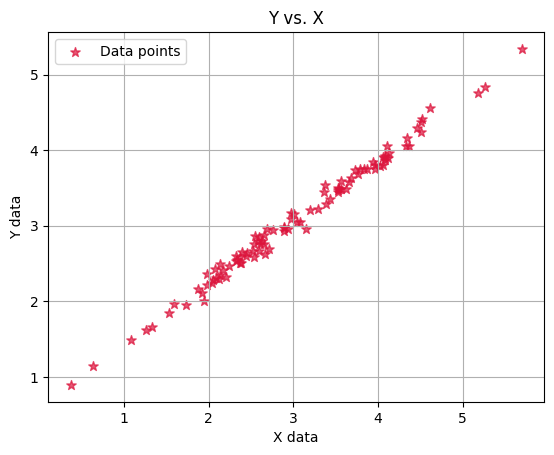

In [ ]:
# We'll quickly copy the code to get our original plot.
# You can either continue with the plot below or you can delete it and put in your personalised plot.

# Plot
##############
plt.figure()

plt.scatter(X, Y, color = "crimson", marker = "*", s = 50, label = "Data points", alpha = 0.7 ) # Colour, Dot Style, Size, Legend Label, Opacity.
# LINE WILL GO HERE LATER #

plt.title("Y vs. X")
plt.xlabel("X data")
plt.ylabel("Y data")

plt.grid("on")
plt.legend()
##############

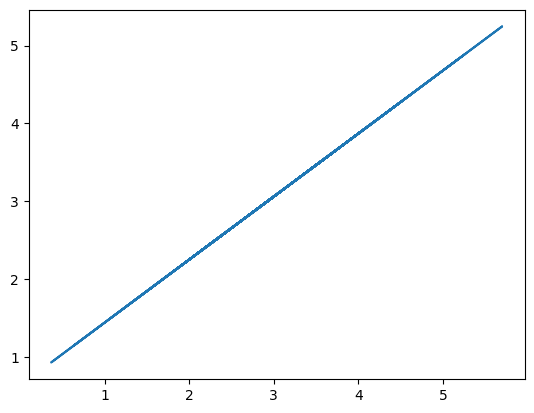

In [ ]:
# Now we want to plot a line on top of everything we've already done
# We can do that by immediately plotting the line after the scatter (where I put # LINE WILL GO HERE # above).

plt.plot(X, line(X,m[0],m[1]))

# ^^^ This line plots your Y as a function of X where Y is the line y = mx + b and m is replaced with m[0] and b with m[1]

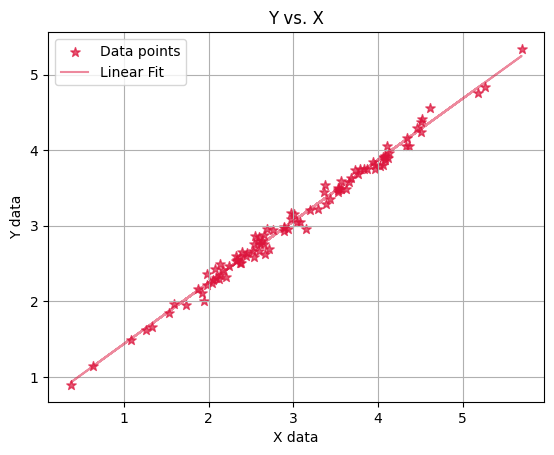

In [ ]:
# The final product should be
plt.figure()

plt.scatter(X, Y, color = "crimson", marker = "*", s = 50, label = "Data points", alpha = 0.7 ) # Colour, Dot Style, Size, Legend Label, Opacity.
plt.plot(X, line(X,m[0],m[1]), color = "crimson", label = "Linear Fit", alpha = 0.5) # I added some customisation

plt.title("Y vs. X")
plt.xlabel("X data")
plt.ylabel("Y data")

plt.grid("on")
plt.legend()

How does the $\texttt{curve_fit}$ line of best fit compare to yours?

Now that you have done an arbitrary example with all the steps, we can proceed with the black hole. The important step that sets apart the black hole from the precious example is getting the data to the form of $y = mx + b$ which we will go over now.

$\textbf{Follow the code below:}$

In [ ]:
# Edit this

# This might seem strange at first but lets scatter plot the 'T' and 'a' data in the form a^3 vs. T^2
# Cube the 'a' array and square the 'T' array below, remember if I want to do exponents in python I use double stars ** (ex. 7**2 = 49)
T_squared = T**2
a_cubed = a**3

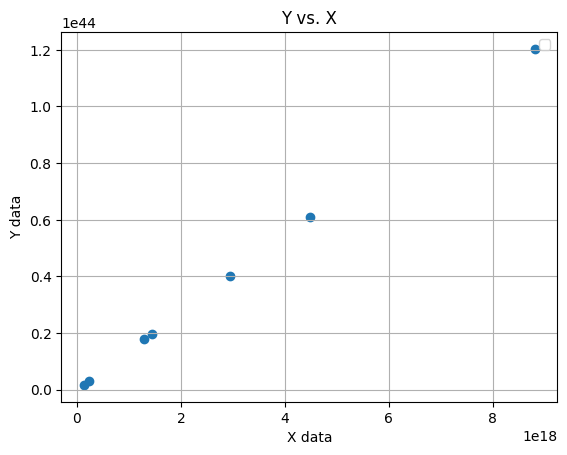

In [ ]:
# Edit this

##############
plt.figure()

plt.scatter(T_squared, a_cubed) # Change these to the T^2 data on the X axis and and a^3 on the Y axis (and get rid of "" signs)

plt.title("Y vs. X") # Keep the "" signs here and change the text in between them to aproppriate names
plt.xlabel("X data")
plt.ylabel("Y data") # Feel free to customize everything like in previous plots

plt.grid("on")
plt.legend()
##############

Great we have a plot of the data where the X axis is $T^2$ and the Y axis is $a^3$. But why did we choose to square and cube our variables? Its so we can rearrange Kepler's law into a form of $y = mx + b$.  

The next paragraph will explain this in more detail.

You should notice the graph shows the same linear trend in the data as before. It might not seem obvious, but if we can find the slope of the line by fitting the form of $y = mx + b$ with $\texttt{curve_fit}$ we can do some math with the slope and find the mass of the black hole. This process will essentially be the same as the one we just did but with real data.

First, we need to write out Kepler's law in the form of $y = mx + b$ :

\begin{equation}
{T^2}= \frac{4\pi^2}{GM_{blackhole}}{a^3} \tag{Kepler's Law}
\end{equation}
\
Since our graph plots $a^3$ on the y-axis and $T^2$ on the x-axis, we can write it in line-form where b = 0.

\begin{equation}
Y = \left(\frac{GM_{blackhole}}{4\pi^2}\right)X + 0
\end{equation}
\
\begin{equation}
a^3 = \left(\frac{GM_{blackhole}}{4\pi^2}\right)T^2 + 0 \tag{re-written}
\end{equation}
\
So Y = $a^3$ and X = $T^2$. This means that the slope of the line in the graph is the term infront of $T^2$:\
\
\begin{equation}
m = \frac{GM_{blackhole}}{4\pi^2} = \frac{\text{Rise}}{\text{Run}}
\end{equation}
\
Take a moment to really understand how and why the slope of our graph is the value above before moving on. Feel free to ask for further explanation.

You'll notice that the mass of the blackhole is contained in the slope of the graph that we just plotted. It is multiplied and divided by some known constants as well but if we can find the value of the slope of the graph using $\texttt{curve_fit}$ then we will know $m$ and can solve for $M_{blackhole}$:

\begin{equation}
M_{blackhole} = \frac{4\pi^2}{G}m
\end{equation}


$\textbf{Using the polynomial fit and code you've already written to find the slope m of the graph $a^3$ vs. $T^2$.}$

In [ ]:
# Run this again, its the fitting function but specifically for b = 0

def line(x,m):
    y = m*x + 0
    return(y)

In [ ]:
# Edit the code below

m, m_var = curve_fit(line, T_squared, a_cubed, p0 = 1e30)  # Change all three of these to the relevant inputs
                                                            # Leave P0 alone, its a rough initial guess for m which saves the
                                                            # algorithm some time, for example of course we know the slope is positive and large

m_delta = np.sqrt(m_var)                                    # The standard deviation (uncertainty) is the root of the variance of m

In [ ]:
# Run this to print out the slope and the uncertainty in the slope

print(m, "is the slope of the line.")
print(m_delta, "is the uncertainty in the slope.")

[1.36433745e+25] is the slope of the line.
[[2.15069031e+22]] is the uncertainty in the slope.


Finally we can solve for $M_{blackhole}$ using the equation we found earlier involving the slope.
\begin{equation}
M_{blackhole} = \frac{4\pi^2}{G}m  \tag{$*$}
\end{equation}
One thing we need to look out for is to make sure our uncertainty in the slope gets scaled up properly to the uncertainty in the mass of the black hole.

In science we frequently take values like $\pi$ and the graviational constant,seen here, to have no uncertainty as over the years they have been studied to extreme precision (we know $\pi$ to 100 trillion digits of precision!). This means we don't need to worry about any funky buisness like having to combine uncertainties, instead we can find the uncertainty of the black hole by feeding it through the equation above.

$\textbf{The final step is plugging $m$ and $m_{delta}$ into the equation above:}$

In [ ]:
M_bh =  4*PI**2*m/G             # Fill in the equation labeled (*) here and dont forgot to use PI and G_value for your constants
                                           # Use * to multiply and / to divide. Remember BEDMAS.

M_delta =   4*PI**2*m_delta/G   # Copy-paste the equation as above but plug in m_unc instead of m.


In [ ]:
# Run this

print("The mass of the blackhole is:", M_bh, "kg or ", M_bh/(2e30), "solar masses.") # Conversion from Kg to Solar masses
print("The uncertainty is", M_delta, "kg or", M_delta/(2e30),"solar masses.")

The mass of the blackhole is: [8.07004237e+36] kg or  [4035021.18387925] solar masses.
The uncertainty is [[1.27213117e+34]] kg or [[6360.65582638]] solar masses.


You should have found $M_{blackhole}$ $\approx$ 4 000 000 $M_{sun}$ using the fitting method, how does it compare to the first method presented in this notebook and how does it compare to [wikipedia's value](https://en.wikipedia.org/wiki/Sagittarius_A*)?

Although we have found the mass, we can visualise our findings with a plot of the data and line of best fit.

$\textbf{Create one last plot of the $a^3$ vs $T^2$ data and the line of slope m}$:

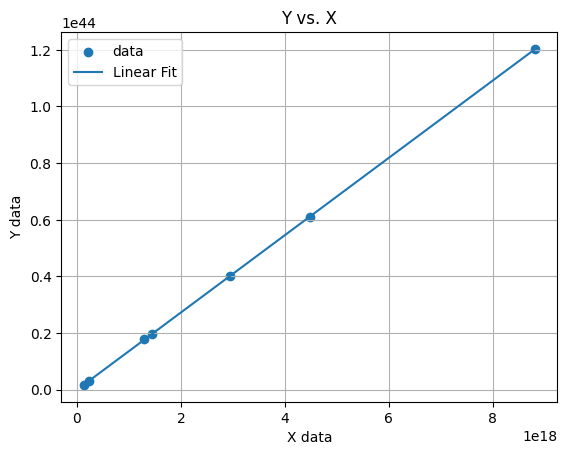

In [ ]:
##############
plt.figure()

plt.scatter(T_squared, a_cubed, label = "data")                     # Change these to the appropriate variables again
plt.plot(T_squared, line(T_squared, m), label = "Linear Fit")         # Change these as well

plt.title("Y vs. X")
plt.xlabel("X data")
plt.ylabel("Y data")

plt.grid("on")
plt.legend()
##############


##**Computing the Distance From a Star to The SMBH**

---


In the last exercise, you have worked on determining the slope of a line. Remember that this is a linear relation between $a^3$ and $T^2$ that you found. This means from now on, we can use this relation to find the distance of a star from the blackhole only by using its period ($T$)! Let's give it a try!

Let's pick a star from our list. We have 7 stars in our list. The periods of each of these stars are stored inside the list T in the code we have been using. I really like the number 3, so let's use the period of the third star from our list T.

$\textbf{Use your understanding of lists and indices to extract the period data of third star from the list:}$

In [ ]:
#Set the variable below to be the period of the third star from the list T
period = T[2] #this is in seconds

Now, to determine the distance to the black hole (a.k.a $a$), we need to put this period into the equation we developed earlier. Remember that the equations looked like:

\begin{equation}
y = mx
\end{equation}

Now, remember what the Kepler's law tells us:

\begin{equation}
T^2 = \frac{4\pi^2}{GM_{blackhole}}a^3
\end{equation}

---
**Small Detour: Cuberoots**

In this section, you will have to take the cuberoot of $a^3$ to find $a$. It may seem confusing at first, but cuberoots work the same way squareroots work. **For example:**

Let's say $x$ is a real number. You are given that $x^2 = 16$. What is $x$?

**Solution:**

Take the squareroot of $x^2$ and find $x$. You can use a calculator or a python function. In python use "np.sqrt(number)" function to get the squareroot of a number.

Now, similar to this, if you had another real number, $y$, and you were given that $y^3 = 27$, you could take the cuberoot of $y^3$ to find the value for $y$. In python, you can the function "np.cbrt(number)" to get the cuberoot of a number.

---

After this tiny detour, make sure you understand what cuberoots are. Now, use your knowledge of the formula and cuberoots to find the value of $a$ from $T$.

$\textbf{What do x and y stand for in terms of $a$ and $T$? Work on the period variable so that it can be used in the equation:}$

**Hint:** *Go back to the section talking about the slope and the linear equation above. Keep in mind that $a$ is cubed and $T$ is squared in the equation.*

In [ ]:
#Let's call the result of this function as distance_3, remember that this is not directly the distance of the star to the blackhole.
distance_3 = m*period**2

#Now, get the direct distance from the star to the blackhole.
distance = np.cbrt(distance_3)

#Finally print the distance value. What are the units of this quantity?
print(distance)

[2.6006589e+14]


$\textbf{Remember that the radius of Sagittarius A* is 12 million km! How do you think the distance quantity you just found compares to this?}$

Discuss with your team mates.

---

#**A Final Review.**

---


This is the end of the project so here is a quick summary of the skills you have learned or improved through this notebook.


You:

1.   $\textbf{defined functions that run over entire arrays of data}$ which saved time in not having to do each computation seperately.
2.   $\textbf{found the uncertainty in your blackhole mass using the standard deviation.}$ Uncertainty is what makes your findings relevant for many reasons but it importantly bounds the measurement you've made and can be used to compare it to other experiments. Ask yourself, "are the mass of the blackhole that I calculated in the two methods the same value?" if not then "do they at least overlap if I inclued the uncertainty of both?". If both experiments agree then it's a sign that they confirm the same measurement, if not, then something might be wrong with one or both of the methods.
3.  $\textbf{visualised data given to you in a clear and understandable way}$ so that you could recognize a trend in the data. Had you only the raw output of the data as you printed earlier you likely wouldn't have spotted this trend (unless you're Neo from the matrix) which emphasizes the importance of data visualisation.
4.  $\textbf{Fit the trend you recognized using an algorithm (curve_fit)}$ to find the mass of blackhole with uncertainty in an elegant manner. This is the bread and butter of scientific programming, in that you use the computer as a tool to do the heavy lifting and computation.
5.  $\textbf{Using the parameters that come out of the fit}$ to calculate values. Once you defined the the fitting equation of form $y = mx+ b$ you took the slope and used that to find physical quantities. It's a direct application of an abstract idea (fitting a line to your data) to get meaningful results (calculating the mass of a blackhole).



That's all! You have completed a project in astronomy and have developed a handful of skills in scientific programming.

# Solutions

---

$\textbf{Exercise 1}$

$\textbf{1.1}$
\begin{equation}
T^2 = \frac{4\pi^2}{GM_{blackhole}}a^3
\end{equation}

$\textbf{2.2}$
\begin{equation}
M_{blackhole} = \frac{4\pi^2}{G}\frac{a^3}{T^2}
\end{equation}

$\textbf{Exercise 2}$

See the code block below

In [ ]:
def mass_bh_advanced(a,T):
  '''
  This function takes a (semi-major axis) in metres and T (period) in seconds (the data we are using already has everything in these units,
  so you don't have to change anything). This function also uses some constants like pi and G (gravitational constant) which are taken from
  python libraries.

  The function calculates M based on the formula we derived earlier and it returns the value calculated.
  '''
  M = ((4*PI**2)/G_value)*((a**3)/(T**2))
  return M